In [245]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
import pandas as pd
from sklearn import neighbors

In [31]:
%matplotlib inline

In [37]:
def loadZipCodeData(filename):
    """
    Loads zipcode data from file
    
    Returns numpy arrays X, Y
    """
    with open(filename, 'r') as f:
        all_lines = (line.strip().split() for line in f)
        all_lines_float = (
            [
                float(item)
                for item in line
            ]
            for line in all_lines
        )
        yx = (
            (line[0], line[1:])
            for line in all_lines_float
        )
        Y, X = zip(*yx)
    return np.array(X), np.array(Y)

In [174]:
train_x, train_y = loadZipCodeData('zip.train')
train_y_cat = pd.get_dummies(train_y).values
test_x, test_y = loadZipCodeData('zip.test')
test_y_cat = pd.get_dummies(test_y).values

In [175]:
train_y_cat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

9.0


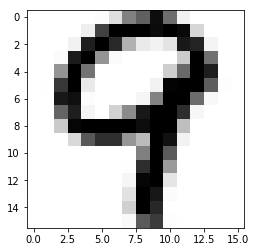

In [144]:
print(test_y[0])
plt.imshow(test_x[0].reshape(16,16), cmap=plt.get_cmap('Greys'))

6.0


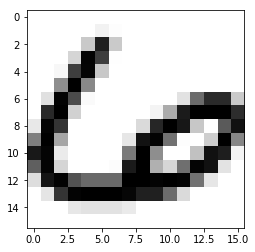

In [145]:
print(test_y[1])
plt.imshow(test_x[1].reshape(16,16), cmap=plt.get_cmap('Greys'))

In [263]:
def solve_regression(X, Y):
    X_transpose = X.T
    return np.matmul(
        np.matmul(
            np.linalg.inv(
                np.matmul(X_transpose, X)), 
            X_transpose),
        Y) 

In [266]:
A = solve_regression(train_x, train_y_cat)
print("train_error: {}%".format(
    100*np.count_nonzero(train_y - np.argmax(np.matmul(train_x, A), axis=1))/float(len(train_y_cat))))
print("test_error: {}%".format(100*np.count_nonzero(test_y - np.argmax(np.matmul(test_x, A), axis=1))
                               /float(len(test_y_cat))))

train_error: 7.62584007681%
test_error: 13.0044843049%


In [201]:
A, res = lstsq(train_x, train_y_cat)[0:2]

In [211]:
print("train_error: {}%".format(
    100*np.count_nonzero(train_y - np.argmax(np.matmul(train_x, A), axis=1))/float(len(train_y_cat))))

train_error: 7.62584007681%


In [213]:
print("test_error: {}%".format(100*np.count_nonzero(test_y - np.argmax(np.matmul(test_x, A), axis=1))
                               /float(len(test_y_cat))))

test_error: 13.0044843049%


In [167]:
np.argmax(np.matmul(test_x, A)[2]) == test_y[2]

True

In [238]:
def nearest_neighbor(X_train, Y_train, value, k):
    distance = np.linalg.norm(X_train - value, axis=1)
    idx = np.argpartition(distance, k)[:k]
    return np.mean(Y_train[idx], axis=0)

In [241]:
np.argmax(nearest_neighbor(train_x, train_y_cat, test_x[0], 1))

9

In [240]:
test_y[0]

9.0

In [244]:
for k in range(1, 10):
    correct = 0
    for value, answer in zip(test_x, test_y):
        res = nearest_neighbor(train_x, train_y_cat, value, k)
        if np.argmax(res) == answer:
            correct += 1
    print("k = {} test_error: {}%".format(k, 100. * (1 - correct / float(len(test_y)))))

k = 1 test_error: 5.6302939711%
k = 2 test_error: 5.87942202292%
k = 3 test_error: 5.53064275037%
k = 4 test_error: 5.68011958146%
k = 5 test_error: 5.53064275037%
k = 6 test_error: 6.12855007474%
k = 7 test_error: 5.82959641256%
k = 8 test_error: 5.92924763328%
k = 9 test_error: 6.27802690583%


In [249]:
for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
    for weights in ['uniform', 'distance']:
        for k in range(1, 10):
            clf = neighbors.KNeighborsClassifier(k, weights=weights, algorithm=algorithm)
            clf.fit(train_x, train_y_cat)
            res = clf.predict(test_x)
            print("k: {} weights: {} algorithm: {} test_error: {}%".format(
                k, weights, algorithm, 100*np.count_nonzero(test_y - np.argmax(res, axis=1))
                                       /float(len(test_y_cat))))

k: 1 weights: uniform algorithm: auto test_error: 5.6302939711%
k: 2 weights: uniform algorithm: auto test_error: 8.22122571001%
k: 3 weights: uniform algorithm: auto test_error: 5.58046836074%
k: 4 weights: uniform algorithm: auto test_error: 7.17488789238%
k: 5 weights: uniform algorithm: auto test_error: 6.12855007474%
k: 6 weights: uniform algorithm: auto test_error: 7.92227204783%
k: 7 weights: uniform algorithm: auto test_error: 6.67663178874%
k: 8 weights: uniform algorithm: auto test_error: 7.92227204783%
k: 9 weights: uniform algorithm: auto test_error: 7.07523667165%
k: 1 weights: distance algorithm: auto test_error: 5.6302939711%
k: 2 weights: distance algorithm: auto test_error: 5.6302939711%
k: 3 weights: distance algorithm: auto test_error: 5.58046836074%
k: 4 weights: distance algorithm: auto test_error: 5.58046836074%
k: 5 weights: distance algorithm: auto test_error: 6.07872446437%
k: 6 weights: distance algorithm: auto test_error: 5.82959641256%
k: 7 weights: distance